
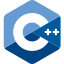
<br>

<div style="text-align:center; font-size:200%;">
 <b>Adventure: Verbindungen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 01 Adventure Verbindungen.ipynb -->
<!-- slides/module_500_solid_grasp/topic_220_grasp_connections.cpp -->


### Aktueller Stand des Adventure-Spiels

- `code/completed/adventure/v2`
- `code/starter_kits/adventure_sk2`
- Klassen `Location` und `World`
- `World` erzeugt `Location`-Objekte (Creator)
- `World` kann `Location`-Objekte finden (Information Expert)


### Nächster Schritt

- Verbinden der `Location`-Objekte
- Zwei neue Verantwortlichkeiten:
  - Erstellen der Verbindungen (Doing)
  - Speichern der Verbindungen (Knowing)


<img src="img/adventure-v2-overview.svg"
     style="display:block;margin:auto;width:30%"/>


### Wer soll die Verbindungen erzeugen?

**Creator:** Wer hat die Initialisierungsdaten?

<ul class="fragment">
<li><tt>World</tt></li>
<li>(Wir brauchen die Daten aller Locations)</li>
</ul>


### Wer soll die Verbindungen speichern?

**Information Expert:** Wer hat die Daten?

<ul class="fragment">
  <li>Die Klasse mit den meisten Informationen</li>
  <li><tt>World</tt> erzeugt alle Verbindungsdaten</li>
  <li>Daher ist <tt>World</tt> der Information Expert</li>
  <li>Die Verbindungsdaten werden in <tt>World</tt> gespeichert</li>
</ul>


**Das ist keine Richtige Anwendung von Information Expert!**


### Was ist das Problem?

- `code/completed/adventure/v3a`


```cpp
struct Connection {
    const Location* from;
    std::string direction;
    const Location* to;
};
```


```cpp
class World {
public:
    // ...
    const Location& GetConnectedLocation(
        const Location& location, const std::string& direction) const;

private:
    // ...
    std::vector<Connection> connections;
};
```


<img src="img/adventure-v3a-overview.svg"
     style="display:block;margin:auto;width:50%"/>


- Häufigster Anwendungsfall für "Verbindungen in Richtung":
  - Navigation von der Location, auf der ein Pawn steht zu einer anderen
    Location
- Wie geht das mit dieser Implementierung?
  - `world.GetConnectedLocation(room1, "north")`
  - Wir haben eine Abhängigkeit von `World` und `Location`!


<img src="img/adv-domain-03-small.svg"
     style="display:block;margin:auto;width:70%"/>


### Wie können wir das vermeiden?

- Verlagern der Verantwortlichkeit für die Navigation
- Jede `Location` kennt ihre ausgehenden Verbindungen
- `room1.GetConnectedLocation("north")`


### Hat uns Information Expert in die Irre geführt?

Nein. In diesem Fall sagt der Information Expert nicht sehr viel aus, wenn
wir ihn korrekt anwenden:

- Die Verantwortung, die wir zuweisen wollen, ist das Speichern der
  Verbindungen
- Jede Verbindung ist eine Beziehung zwischen zwei Locations
- Es spielt keine Rolle, dass `World` alle Locations kennt
- Wir haben keinen Informations-Experten für das Speichern der Verbindungen


### Lösungen

- Zugeordnete Doing-Verantwortlichkeit:
  - Finden Sie eine zugehörige Doing-Verantwortlichkeit,
  - Wählen Sie die Klasse, die verantwortlich sein sollte, und
  - Ordnen Sie die Daten so zu, dass diese Klasse zum Information Expert wird
- Verwenden Sie andere Muster oder Techniken, um die Verantwortlichkeit
  zuzuweisen


<img src="img/adventure-v3b-overview.svg"
     style="display:block;margin:auto;width:30%"/>


### Merkregel: Lokale Informationen > Globaler Zustand

- Versuchen Sie, die Verantwortlichkeit für Informationen möglichst lokal zu
  halten
- Das verringert fast immer die Kopplung im System